# A. Business Understanding

The company wishes to have a visualisation and analysis of the retail data to better understand which factors could affect sales of a department store. Factors that could affect the retail sales are the date, fuel price of the area, markdown prices, unemployment and whether it is a holiday. 
1. Analyse the different datasets and its factors against sales
2. Model the effects of markdowns on holiday weeks
3. Visualise and explain the effects each factor on sales.

The goal of this is to uncover factors within the datasets that could also affect the overall analysis of sales besides the markdown prices and holiday seasons. This is to help the company better strategise when to have sales and when to not have sales to get the best sales outcome. The dataset we will be using will be a retail sales datasets that contain multiple factors during the different seasons and regions. The tool used for this analysis and visualisation is Jupyter notebook. What we also hope to achieve from this analysis and visualisation is to give more insights into the relationship between different factors and how it affects sales. The success of this will be determined by how well each data is analysed and visualized, and how well it can provide insights from the visualisation. Personnel involved in this will be the four of us in this assignment group and we will be working on our own laptops and computers to accomplish this data analysis and visualisation project. The software used will be Jupyter notebook and the data used will be collected from kaggle. The results of this project will be in the form of visualizations that jupyter notebook that uses python will provide with the tools for the data visualisation alongside the analysis of each model with further explanation from us. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_store = pd.read_csv("stores data-set.csv")
df_feature = pd.read_csv("Features data set.csv",parse_dates=["Date"])
df_sales = pd.read_csv("sales data-set.csv",parse_dates=["Date"])

#B Data Understanding

##Initial data collection
The data set we are going to be using is called Retail Data Analytics which is acquired from Kaggle. The link to the datasets that we are using is from this link https://www.kaggle.com/manjeetsingh/retaildataset. Kaggle provides a lot of different kinds of dataset which allows us to find this dataset from the website. We had little to no problems when trying to find a dataset related to retailing as there is a lot of such collected data that can be found on Kaggle. Data loading will be done using seaborn and plt which would be imported into the jupyter notebook.

## Data description
stores data-set.csv (Total rows : 45)
* Store - the store number | integer | 1 - 45 |
* Type - the store type | object | A - C |
* Size - the store size | integer| m² |

sales data-set.csv (Total rows : 421571)
* Store - the store number | integer | 1 - 45 |
* Dept - the department number | integer | 1 - 99 |
* Date - the week | datetime64 | 05-02-2010 - 01-11-2012 |
* Weekly_Sales -  sales for the given department in the given store | float |
* IsHoliday - whether the week is a special holiday week | boolean |

feature data-set.csv (Total rows:  8191)
* Store - the store number | integer | 1 - 45 |
* Date - the week | datetime64 | 05-02-2010 - 01-11-2012 |
* Temperature - average temperature in the region | float | °F
* Fuel_Price - cost of fuel in the region | float |
* MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the * time. Any missing value is marked with an NA | float |
* CPI - the consumer price index | float |
* Unemployment - the unemployment rate | float |
* IsHoliday - whether the week is a special holiday week | boolean |



In [2]:
print(df_store.info())
print(df_store.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [3]:
print(df_feature.info())
print(df_feature.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        

In [4]:

print(df_sales.info())
print(df_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None
   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-05-02      24924.50      False
1      1     1 2010-12-02      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-05-03      21827.90      False


## C Data exploration/Data preperation

In [5]:
data_date = df_feature.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = df_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

In [6]:
data.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,46.601399,60.663782,3.358607,171.578394,7.999151
std,5.399713,15.172792,0.429401,3.100148,0.483853
min,39.000000,30.480889,2.672067,167.546485,6.953711
25%,44.000000,47.720222,2.885367,168.408144,7.508333
50%,46.000000,61.051111,3.488644,171.386189,8.150133
75%,47.000000,74.697333,3.726133,174.724576,8.428578
max,80.000000,82.176444,3.997778,176.652613,8.619311


<AxesSubplot:title={'center':'Unemployment'}, xlabel='Date'>

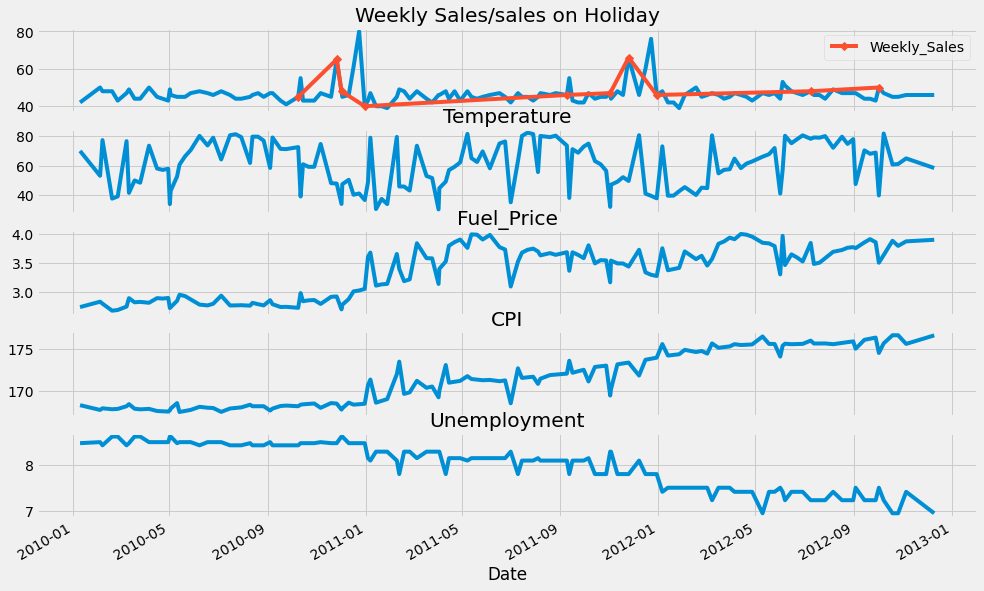

In [7]:
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

Note: Sales (Million) <br>
This is to show the relation of weekly sales between the features in the dataset. From here we can see that sales peaked when the temperature is the highest. Along side factors such as fuel prices, the sales fluctuates depending on a weekly basis. It does seem like unemployment rate and CPI did not affect the sales as much in this case. Also it does seem that the holidays affect positively on sales according to the comparison between holiday sales and non-holiday sales.

<AxesSubplot:>

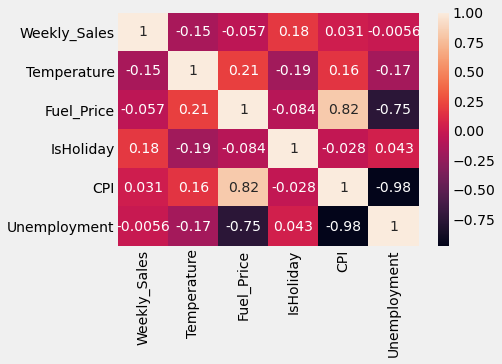

In [8]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

This is the heatmap of the dataset we use.

Text(0, 0.5, 'Sales')

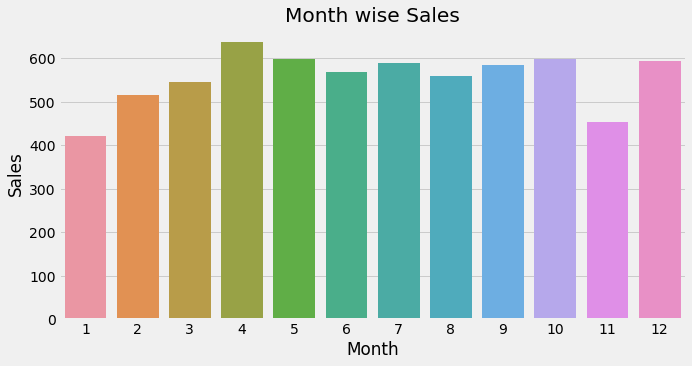

In [9]:
data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

Note: -<br>
1. This is based on the whole period of the dataset.<br>
2. Sales(Million)<br>

Monthly wise sales histogram has shown some interesting results. Many would think that December would net in the most sales due to Christmas celebration, but instead April had the most sales compared to the other months.

Text(0, 0.5, 'Sales')

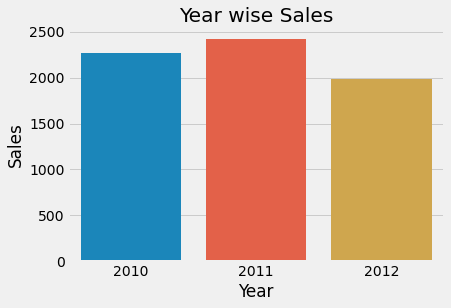

In [10]:
data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})

sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

Note: Sales (Million)<br>
This histogram shows the sales difference between years 2010, 2011, 2012. 2011 is the year with the highest year wise sales.

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Weekly_Sales"],freq=45) 

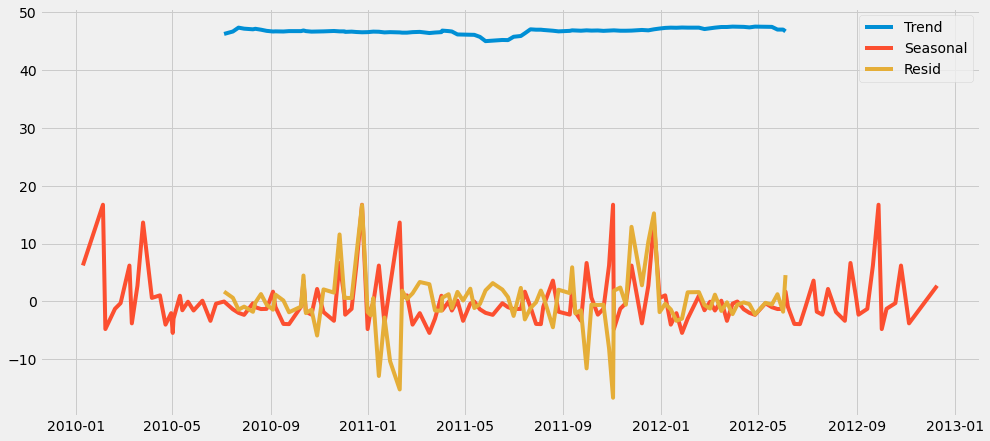

In [12]:
plt.figure(figsize=(15, 7))
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(["Trend", "Seasonal","Resid"], loc ="upper right") 

This graph shows the trend, seasonal and residual analysis.

In [13]:
data_Store = df_feature.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})

temp_store = df_sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_Store.set_index(np.arange(0,45),inplace=True)
df_store["temp"] = data_Store.Temperature
df_store["Fuel_Price"] = data_Store.Fuel_Price
df_store["holiday"] = data_Store.IsHoliday
df_store["Weekly_Sales"] = temp_store.Weekly_Sales

In [14]:
df_store.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

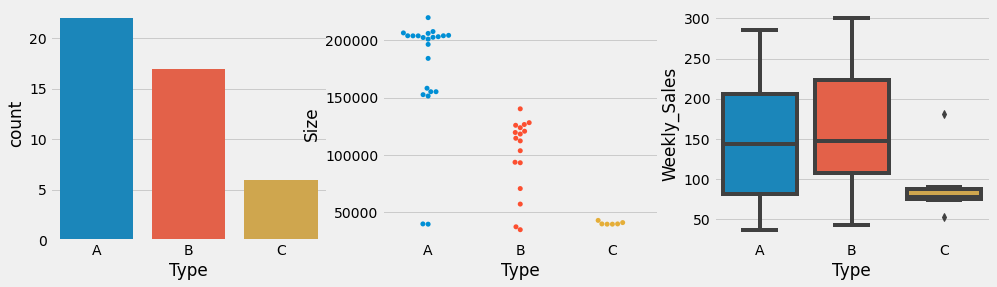

In [15]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(df_store.Type,ax=ax[0])
sns.swarmplot(data = df_store,y="Size",x="Type",ax=ax[1])

sns.boxplot(data = df_store,y="Weekly_Sales",x="Type",ax=ax[2])

Note: Weekly_sales (Million)
* The first graph shows the count of each type of stores that exists within the dataset. With type A being the highest.
* The second graph shows the size of the type of stores. This graph shows the abundance of store with type A being larger than 150,000 m² and all of type C being under 50,000 m².
* The third graph shows the weekly sales of each store type. With type A and B having around thee same median sales but with very different minimum and maximum sales while C is consistently around 70 million every week.

In [16]:
len(df_sales["Dept"].unique())

81

In [17]:
data_Dept = df_sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


Text(0.5, 0, 'Department')

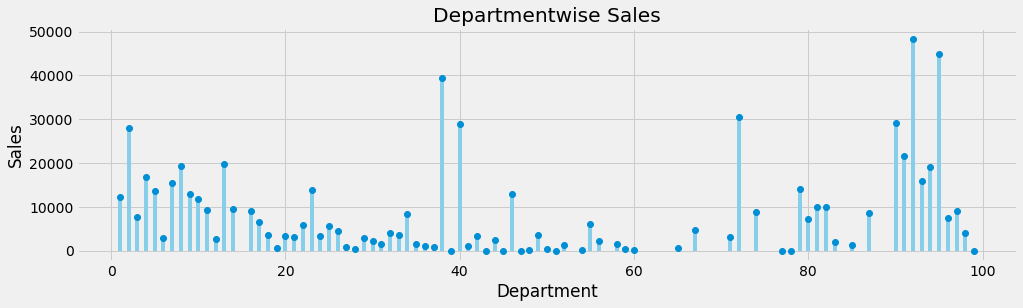

In [18]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

Note: Sales (Million)<br>
This graph plot shows the amount of sales acquired in this dataset by each department regardless of stores each week. There are many departments that do not hold any sales at all or at least have only gotten a minimal amount that does not show any relevance. In this case, department 92 has the most sales amount acquired throughout the 3 year period compared to all the other 98 departments of these 45 stores.

In [19]:
sales_date_store = df_sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(df_feature,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,df_store[["Store","Type"]] ,  how='left', on=["Store"])

data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

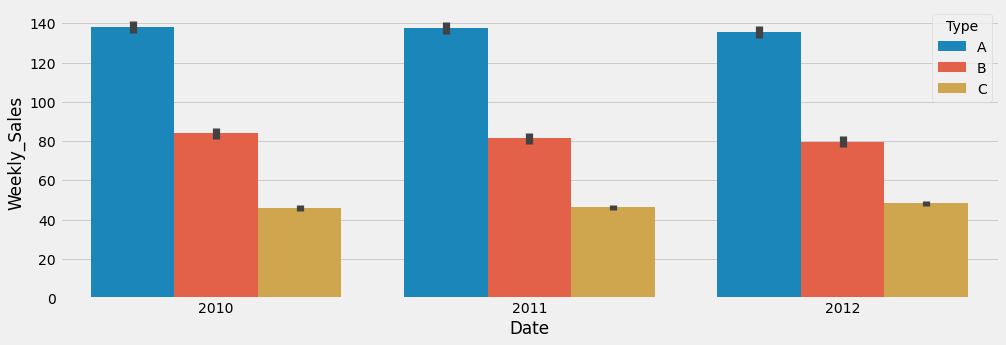

In [20]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

Note: Weekly_Sales (Million)<br>
This histogram shows the weekly sales of each type of store in each year from year 2010 to year 2012. From this we can see that the type A stores are making the most profit with type B coming in second but seperated by a huge margin and C being the least. This might be due to the difference in size for the type of the stores which means they could not carry as many products as type A could.

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

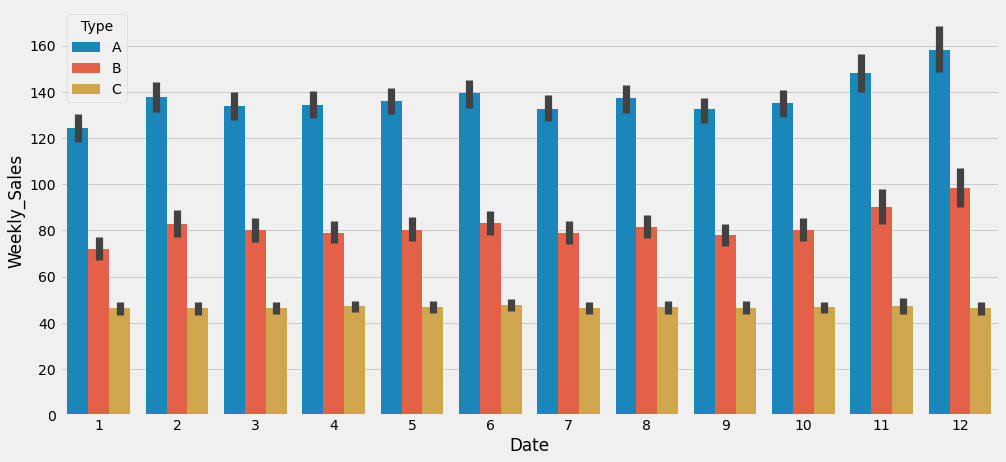

In [21]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)

Note: Date = Month<br>
This graph shows the weekly sales of each month of all 3 years for each store type. As shown from the graph, store type C has a very consistent sales pattern where all its weekly sales are hovering around the 450,000 range. Whereas store type A and B shows fluctuations in their weekly sales between months with December being the highest for both types. This might be due to the holiday season of December which have caused such influx in sales numbers.

Text(0.5, 0, 'Date')

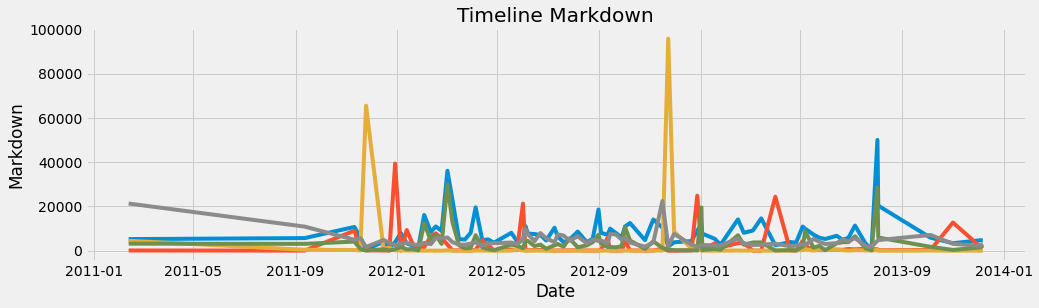

In [22]:
plt.figure(figsize=(15,4))
train_markdown = data_table[data_table.MarkDown2.notnull()]
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})


plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index,train_markdown.MarkDown2)
plt.plot(train_markdown.index,train_markdown.MarkDown3)
plt.plot(train_markdown.index,train_markdown.MarkDown4)
plt.plot(train_markdown.index,train_markdown.MarkDown5)
plt.title("Timeline Markdown")
plt.ylabel("Markdown")
plt.xlabel("Date")

This graph only shows the aggregation of all 5 markdowns' average during that period. As we can see there begining of 2011 has little to no markdown as the stocks are fairly new and no clearance of stock is needed. However, you canm see there are small spikes in price markdowns and that might be due to the acceptance of new stocks, therefore a price markdown is needed for the older stocks. Besides that there is a huge spike on the markdown that can be seen on the end of 2011 as well as 2012.

Text(0, 0.5, 'Markdown')

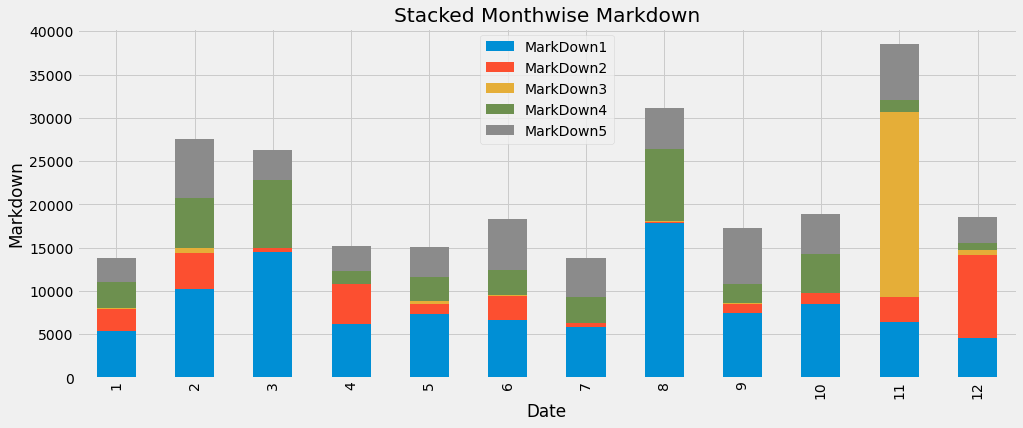

In [23]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_month.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Stacked Monthwise Markdown")
plt.ylabel("Markdown")

Note : Date = Month <br>
This stacked bar chart shows the amount of markdown given on average of each month for each type of markdown. Besides that it also shows the total amount on average of each month's markdown over these 3-year period.

Text(0, 0.5, 'Markdown')

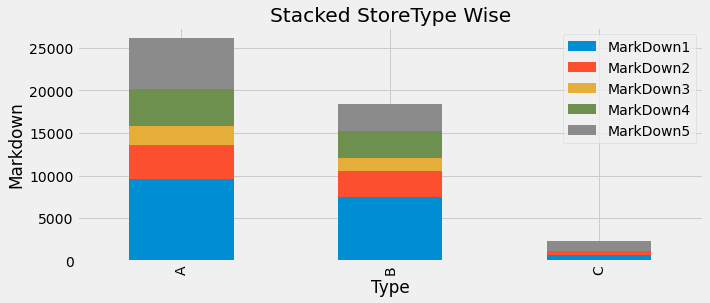

In [24]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_type.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Stacked StoreType Wise")
plt.ylabel("Markdown")

Note: Type = Store type <br>
This stacked bar chart shows the total amount of for all the markdowns on average for each type of stores within this 3 year period. Besides that each markdown is split into sections for easier viewing of which type of markdown is more relevant.

In [25]:
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima_model import ARIMA
import xgboost as xgb

In [26]:
itt = IterativeImputer()
df = itt.fit_transform(data_table[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]) 
data_table.MarkDown1 = df[:,0]
data_table.MarkDown2 = df[:,1]
data_table.MarkDown3 = df[:,2]
data_table.MarkDown4 = df[:,3]
data_table.MarkDown5 = df[:,4]

data_table['CPI'].fillna((data_table['CPI'].mean()), inplace=True)
data_table['Unemployment'].fillna((data_table['Unemployment'].mean()), inplace=True)
data_table['IsHoliday'] = data_table['IsHoliday'].map({True:0,False:1})

#create new column
data_table["Month"] = data_table.Date.dt.month
data_table["Year"] = data_table.Date.dt.year
data_table["WeekofYear"] = data_table.Date.dt.weekofyear
data_table.drop(['Date'],axis=1,inplace=True)

#create dummies out of categorical column
data_table = pd.get_dummies(data_table,prefix=["Type"])

# D Modelling

In [27]:
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
classifiers = [
    LinearRegression(),
    Lasso(alpha =16, random_state=100),
    xgb.XGBRegressor(),
    RandomForestRegressor(), 
    DecisionTreeRegressor(),
    SVR()
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

# E Evaluation

In [29]:
#@title Default title text
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score


,rmse,score,model
name,,,
SVR,53.942414,0.083574,SVR()
Lasso,51.117297,0.177052,"Lasso(alpha=16, random_state=100)"
LinearRegression,40.380025,0.486465,LinearRegression()
DecisionTreeRegressor,17.703660,0.901290,DecisionTreeRegressor()
RandomForestRegressor,12.800603,0.948394,"(DecisionTreeRegressor(max_features='auto', ra..."
XGBRegressor,8.368045,0.977946,"XGBRegressor(base_score=0.5, booster='gbtree',..."


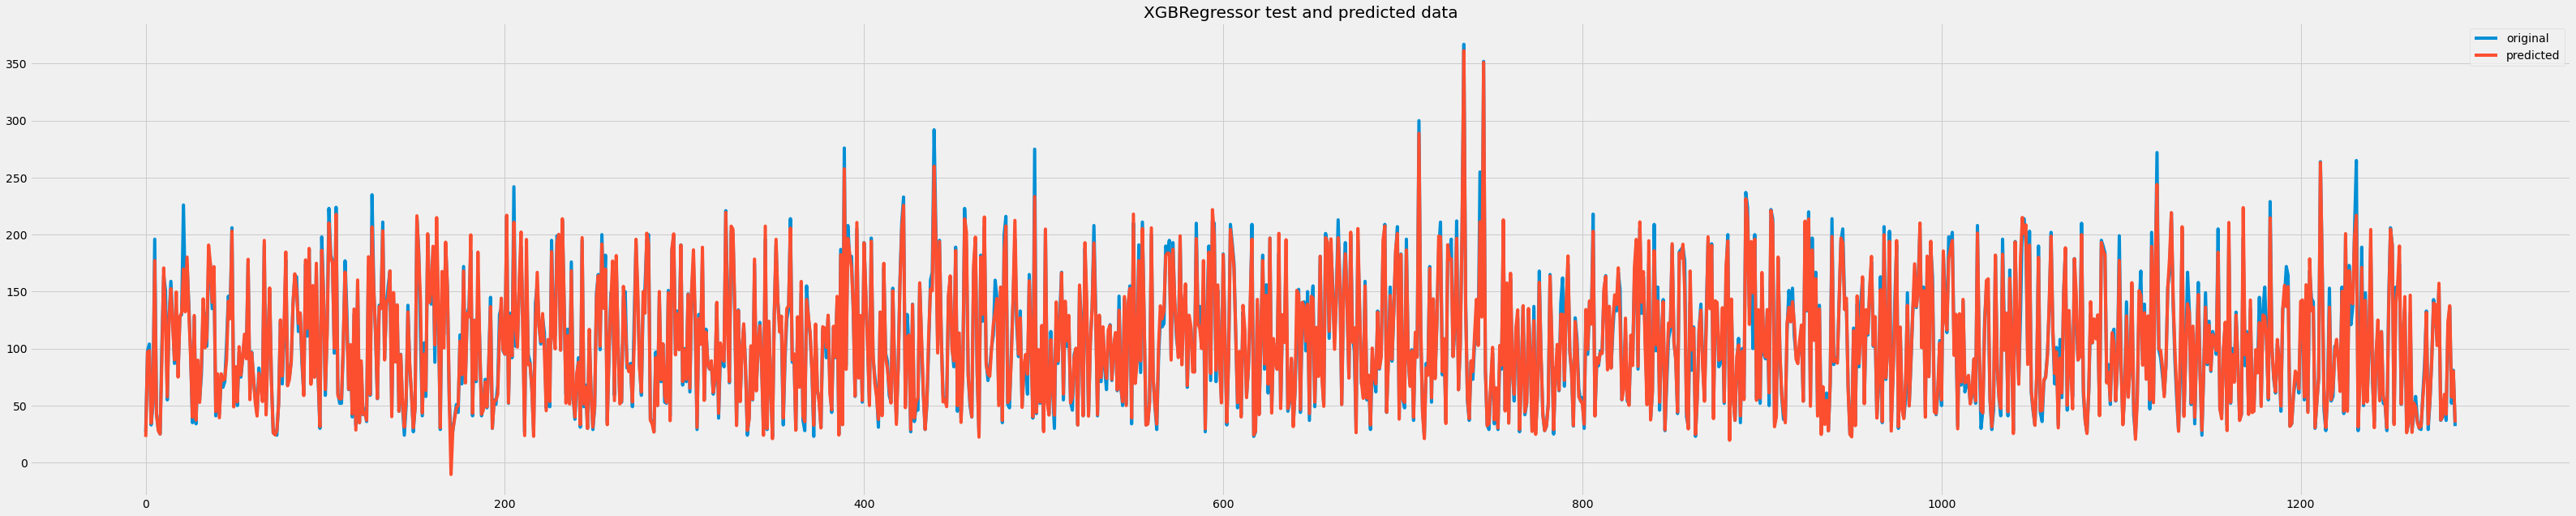

In [30]:
model = df_score.loc["XGBRegressor","model"]
predict = model.predict(X_test)
x_ax = range(len(y_test))
plt.figure(figsize=(50,10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predict, label="predicted")
plt.title("XGBRegressor test and predicted data")
plt.legend()
plt.show()

#Random Forest Regressor with grid search


In [31]:

from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]}
grid=GridSearchCV(RandomForestRegressor(),param_grid,verbose=1)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  2.0min finished


{'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [32]:


grid_pred = grid.predict(X_test)
print("Random Forest Regressor with grid search")
print("score = ",grid.score(X_train,y_train))
print("rmse = ",np.sqrt(mean_squared_error(grid.predict(X_test), y_test)))


Random Forest Regressor with grid search
score =  0.9568938024732248
rmse =  15.072943169591275


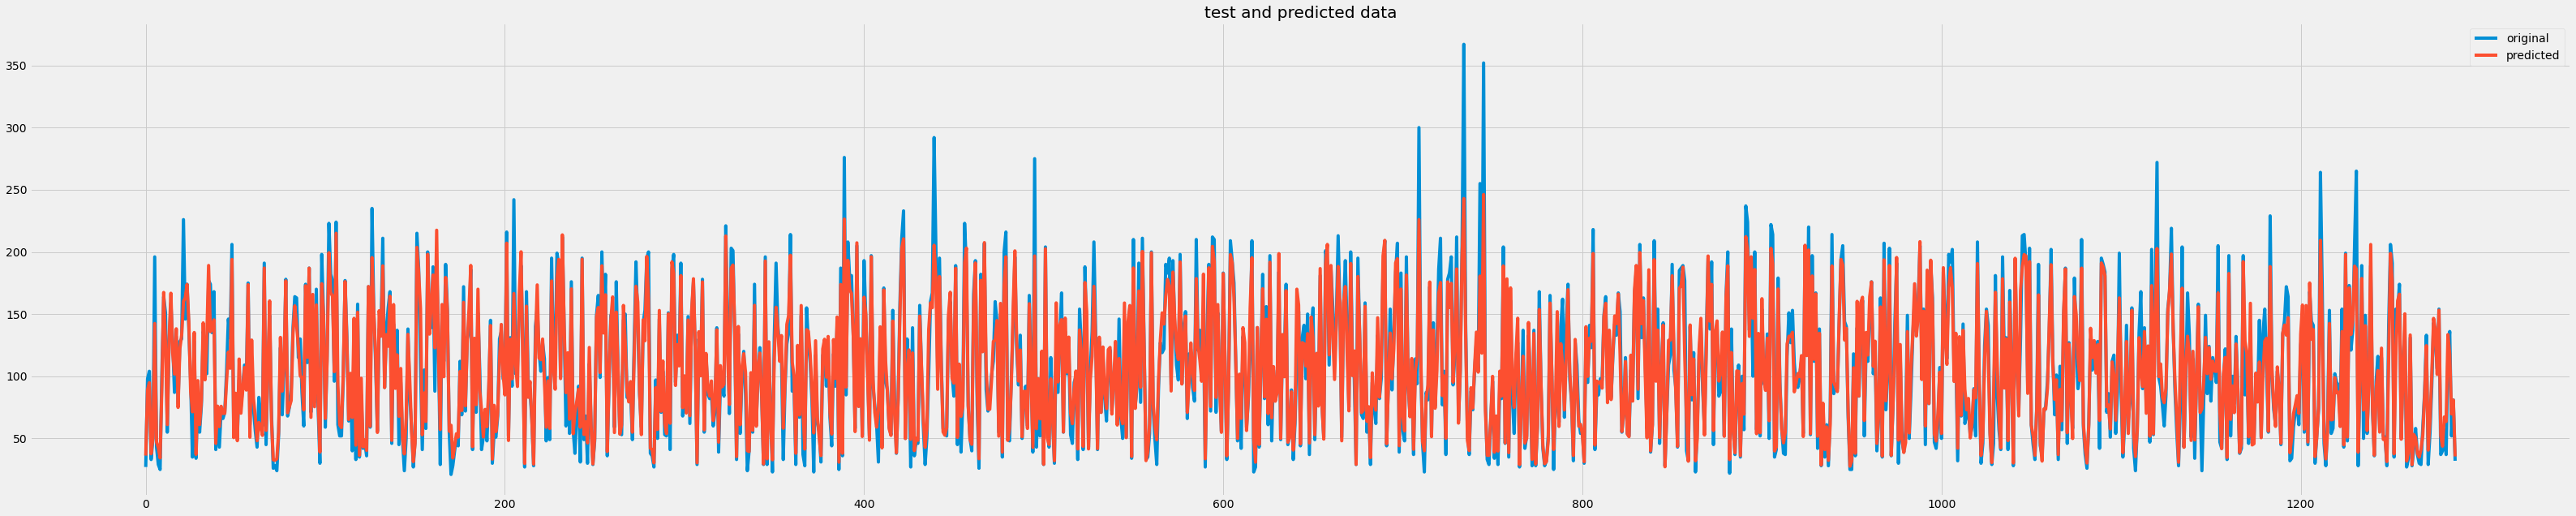

In [33]:
x_ax = range(len(y_test))
plt.figure(figsize=(50,10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, grid_pred, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

# F Deployment
 

**Deployment plan**
We deployed this analysis and forecast on Google Colab as all the libraries downloaded will stay within the Google servers. We first installed pip to install other libraries used for the analysis and forecast. Firstly, you would need the 3 csv files in your Google Drive so that you can upload it into the Colab. After that, you can just run everything and the analysis and visualisation with explanation will be displayed. The forecast part of the analysis will be directly under the visualisation. The forecast will have the predicted and actual data plotted on each other to better see the difference between the predicted and actual data. 

**Monitoring and maintenance plan** 

First, we combine those 3 dataset from 3 different csv file together, then we show the data in different satistical format and do data analsysis. After that we scaling the data with IterativeImputer(), then we starting doing the fit and split. Then we fit the x_train and y_train into the different modeling techniques and compare the score between these techniques.

**Final Report**  
After trying few model to do the prediction on weekly sales we find out that According to the test we do in above model we find out that random forest regressor have higheset accuracy comparing with the other model that we use in the modelling part. therefore, we decide to make an improvement on random forest regressor by using cross validation (gridsearch). Before the we apply gridsearch in random forest regressor the accuracy is 0.946067	with maximum 1.0. after we apply the gridsearch the accuracy raise 0.011 reach 0.957504.

**Experience documentation**
 
The important experience we learn form this assignment is we face a problem which is the dataset provide by the company in the Kaggle he separates into 3 CSV file and the data in these files all so complicate which make us hard to do the analysis. Therefore, we do the regression analysis in order to understand the relationship between the variable. For the predictive analysis, we have learn some modelling techniques ourselves which are not taught in the practical class which is XGBoots Regression and Lasso , we tried to fit these model can compare to those model we learn from tutor such as Linear Regression , Random Forest Regressor and SVR in order to find out the best model to fit in this project. We also learn how to use the use the GridSearchCV which is s cross validation in order to improve the accuracy when fit the those modelling techniques.Lastly, we think we can do some improvement by using others modelling techniques such as traditional statistic, ARIMA or SARIMA model. This is because those datasets we analysing in this assignment is consider a time series data, these models can get a more suitable result.